In [6]:
import numpy as np
import os



In [7]:
landmark_crop_dic = np.load('./asserts/training_data/landmark_crop_dic.npy',allow_pickle=True).item()
print(landmark_crop_dic["./asserts/training_data/split_video_25fps_crop_face/RD_Radio45_000_corrected/000052/000470.jpg"].shape)


for key in landmark_crop_dic.keys():
    print(key)
    print(landmark_crop_dic[key].shape)
    print(landmark_crop_dic[key][0])
    # print(landmark_crop_dic[key][1])
    # print(landmark_crop_dic[key][2])
    break

./asserts/training_data/split_video_25fps_crop_face/RD_Radio46_000_corrected/000000/000000.jpg
torch.Size([1, 68, 2])
tensor([[ -7.7312, 103.7603],
        [ -7.2184, 153.9706],
        [ -2.5264, 200.7077],
        [  5.1870, 242.5787],
        [ 23.5739, 280.2895],
        [ 50.2014, 312.3293],
        [ 84.8341, 341.2489],
        [118.7797, 363.6740],
        [159.2389, 371.2652],
        [199.7168, 364.7096],
        [237.5452, 345.0473],
        [273.6465, 316.2220],
        [296.0715, 282.2763],
        [309.8042, 244.9563],
        [316.2378, 203.1042],
        [319.1981, 157.0730],
        [321.3536, 105.8226],
        [ 33.7070,  72.8549],
        [ 56.1132,  53.0560],
        [ 84.9950,  46.7169],
        [115.4863,  50.8160],
        [143.9965,  62.4498],
        [176.3516,  60.2898],
        [205.5863,  50.1245],
        [235.5084,  46.4538],
        [264.4890,  52.9861],
        [285.9163,  71.6838],
        [161.0093,  87.1715],
        [161.0892, 114.1897],
        [161

In [37]:
###### 提前存的landmark
a = landmark_crop_dic['./asserts/training_data/split_video_25fps_crop_face/RD_Radio45_000_corrected/000000/000000.jpg']



tensor([[[  5.1094, 132.6913],
         [  8.4287, 179.4507],
         [ 18.5378, 222.2539],
         [ 27.6558, 263.1159],
         [ 42.6217, 303.9285],
         [ 63.3615, 335.9196],
         [ 93.7822, 360.0311],
         [128.0522, 378.2616],
         [166.0973, 381.8390],
         [202.0941, 373.7369],
         [237.0340, 355.8964],
         [265.1182, 334.2148],
         [284.3398, 301.8860],
         [297.6228, 258.8852],
         [305.0742, 217.8831],
         [308.6271, 176.9141],
         [306.3235, 135.0197],
         [ 34.7888,  69.0824],
         [ 55.0921,  49.4161],
         [ 81.3423,  41.3963],
         [109.6325,  44.0815],
         [136.0474,  55.5552],
         [182.8563,  58.0839],
         [209.0817,  47.1401],
         [237.3389,  45.9266],
         [263.7374,  55.4509],
         [281.4709,  77.7201],
         [160.7354,  93.3614],
         [160.9001, 112.8548],
         [161.0648, 132.3482],
         [161.2296, 151.8416],
         [132.2942, 188.1515],
        

In [10]:
from tensor_processing import *
import matplotlib.pyplot as plt

import cv2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

torchlm (1, 68, 2)


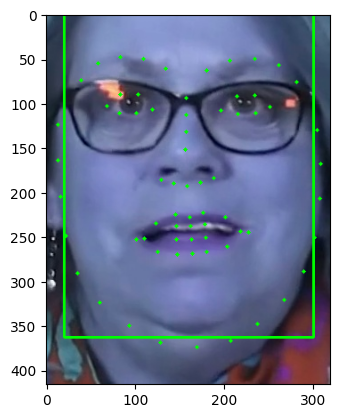

In [30]:
import torchlm
from torchlm.tools import faceboxesv2
from torchlm.models import pipnet

facealigner = FaceAlign(ratio=1.6, device=device)
smoothmasker = SmoothMask(radius=15,sigma=4,padding='same').to(device)  
feed_img = cv2.imread('./asserts/training_data/split_video_25fps_crop_face/RD_Radio45_000_corrected/000052/000470.jpg')
landmark_store = landmark_crop_dic["./asserts/training_data/split_video_25fps_crop_face/RD_Radio45_000_corrected/000052/000470.jpg"]


torchlm.runtime.bind(faceboxesv2(device="cuda"))  # set device="cuda" if you want to run with CUDA
# set map_location="cuda" if you want to run with CUDA
torchlm.runtime.bind(
  pipnet(backbone="resnet18", pretrained=True,  
         num_nb=10, num_lms=68, net_stride=32, input_size=256,
         meanface_type="300w", map_location="cuda", checkpoint=None) 
) # will auto download pretrained weights from latest release if pretrained=True
landmarks, bboxes = torchlm.runtime.forward(feed_img)
image = torchlm.utils.draw_bboxes(feed_img, bboxes=bboxes)
image = torchlm.utils.draw_landmarks(image, landmarks=landmarks)

print("torchlm",landmarks.shape)
plt.imshow(image)


In [31]:
! ls

 2face.jpg				 ref_img_tensor.pt
 2face2.jpg				 requirements.txt
 README.md				 sync_batchnorm
 __pycache__				 tensor_processing.py
 asserts				 test_deng_npy_top_left.py
 config					 test_landmark.py
 crop_frame_tensor.pt			'test_landmark_crop copy.ipynb'
 data_processing.py			 test_landmark_crop.ipynb
 data_processing_origin.py		 test_npy.py
 data_processing_正脸化.py		 torch_affine_ops.py
 dataset				 train_DINet_clip.py
 deepspeech_tensor.pt			 train_DINet_clip_只有唇形同步损失.py
 inference.py				 train_DINet_frame.py
 inference_test_copy_from_train.ipynb	 utils
 inference_实验1.py			 w640slw.jpg
 inference_实验2.py			 wandb
 inference_实验5.py			 测试用
 inference_实验6.py			 邓-face_align_img_resize.jpg
 inference_实验7.py			 邓-pre_frame_origin_size.jpg
 inference_实验7集成yihao正脸化.py	 邓-reform_img_np.jpg
 models					 邓-test_crop_landmark.ipynb
 pipnet_resnet18_10x98x32x256_wflw.pth	 邓-测试smoothmask.ipynb


In [32]:
! cp ./pipnet_resnet18_10x98x32x256_wflw.pth /root/.cache/torch/hub/checkpoints/pipnet_resnet18_10x98x32x256_wflw.pth

torch.Size([1, 68, 2])
(416, 320, 3)


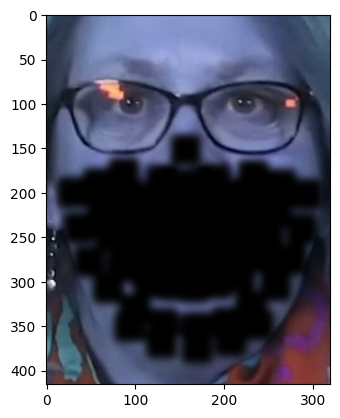

In [36]:

print(landmark_store.shape)
print(feed_img.shape)
# face_align_img, lmrks_align, face_align_matrix = facealigner(feed_img, landmarks_tensor,out_W=320)
source_image_data = torch.from_numpy(feed_img/255.0).float().permute(2,0,1).cuda().unsqueeze(0)
# masked_output = smoothmasker(source_image_data.to(device), landmark_store.to(device))
masked_output = smoothmasker(source_image_data.to(device), torch.from_numpy(landmarks).to(device))



torch.save(source_image_data, './smoothmask的输入图像.pth')
torch.save(torch.from_numpy(landmarks), './smoothmask的输入landmark.pth')



plt.imshow(masked_output[0].permute(1,2,0).cpu().detach().numpy())